In [ ]:
import csv
import emoji
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


%matplotlib inline

In [ ]:
def read_csv(filename):
    phrase = []
    emoji = []

    with open(filename) as emoji_data:
        csvReader = csv.reader(emoji_data)
        for row in csvReader:
            phrase.append(row[0])
            emoji.append(row[1])

    X = np.asarray(phrase)
    Y = np.asarray(emoji, dtype=int)
    return X, Y

In [ ]:
X_train, Y_train = read_csv('./dataset/train_emoji.csv')
X_test, Y_test = read_csv('./dataset/test_emoji.csv')

In [ ]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

Y_train_oh = convert_to_one_hot(Y_train, C=5)
Y_test_oh = convert_to_one_hot(Y_test, C=5)

In [ ]:
emoji_dictionary = {
    "0": ":heart_with_arrow:",
    "1": ":baseball:",
    "2": ":smile:",
    "3": ":disappointed:",
    "4": ":fork_and_knife:"
}

def label_to_emoji(label):
    return emoji.emojize(emoji_dictionary[str(label)],  language='alias')

In [ ]:
for idx in range(10):
    print(X_train[idx], label_to_emoji(Y_train[idx]))

In [ ]:
def read_glove_vecs(filename):
    with open(filename, 'r') as f:
        words = set()
        word_to_vec_map = {}
        for line in f:
            line = line.strip().split()
            curr_word = line[0]
            words.add(curr_word)
            word_to_vec_map[curr_word] = np.array(line[1:], dtype=np.float64)
        
        i = 1
        words_to_index = {}
        index_to_words = {}
        for w in sorted(words):
            words_to_index[w] = i
            index_to_words[i] = w
            i = i + 1
    return words_to_index, index_to_words, word_to_vec_map

In [133]:
word_to_index, index_to_word, word_to_vec_map = read_glove_vecs('../../datasets/glove.6B.50d.txt')

In [134]:
def embed_sentences(sentence):
    counter = 0
    words = sentence.lower().split()
    embedding = np.zeros((50,))
    for w in words:
        if w in list(word_to_vec_map.keys()):
            counter += 1
            embedding += word_to_vec_map[w]
    if counter > 0:
        embedding /= counter
    return embedding

In [135]:
X_train_embed = np.array([embed_sentences(x) for x in X_train])
X_test_embed = np.array([embed_sentences(x) for x in X_test])

In [136]:
emoji_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(50,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

emoji_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = emoji_model.fit(X_train_embed, Y_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test_embed, Y_test), verbose=1)


Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2968 - loss: 1.5538 - val_accuracy: 0.2857 - val_loss: 1.4895
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3801 - loss: 1.4648 - val_accuracy: 0.3214 - val_loss: 1.4769
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3891 - loss: 1.4378 - val_accuracy: 0.3750 - val_loss: 1.4673
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5043 - loss: 1.3992 - val_accuracy: 0.3571 - val_loss: 1.4517
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5789 - loss: 1.3260 - val_accuracy: 0.4107 - val_loss: 1.4311
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6671 - loss: 1.2971 - val_accuracy: 0.3929 - val_loss: 1.4113
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5616 - loss: 1.2522 - val_accuracy: 0.3750 - val_loss: 1.3854
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6171 - loss: 1.1928 - val_accuracy: 0.4464 - val_loss: 1.3628

In [137]:
emoji_model.summary()

Model: "sequential_30"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_93 (Dense)                │ (None, 128)            │         6,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_94 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_95 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,329 (177.07 KB)

 Trainable params: 15,109 (59.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,220 (118.05 KB)

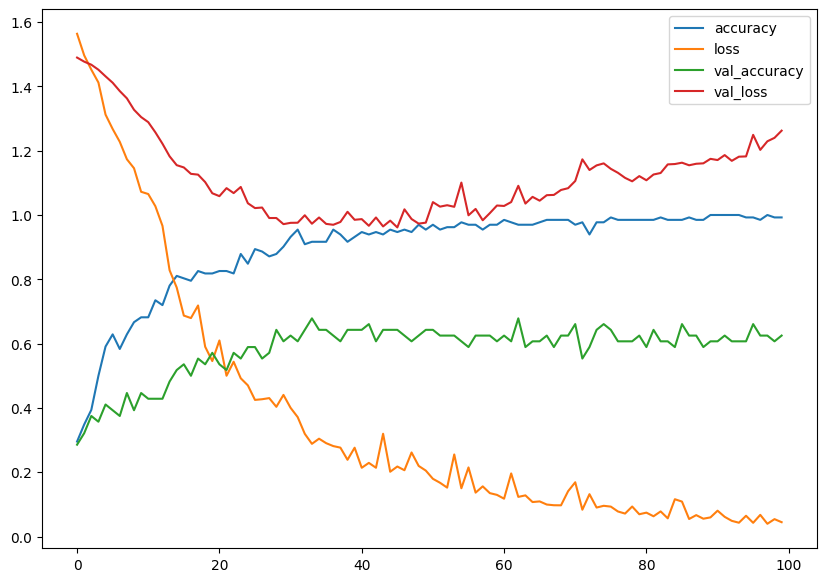

In [138]:
history_dict = history.history
graph = pd.DataFrame(history_dict).plot(figsize=(10, 7))
